In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from gensim import corpora
from gensim.models import Phrases
# from ds_voc.text_processing import TextProcessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

C:\Users\Akhand\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")

<h1>Text Cleaning</h1>

In [3]:
cleaned = []
def cleaning(text):
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
#     convert to lower case
    tokens = [w.lower() for w in tokens]
#     remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
#     words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in stripped if not w in stop_words]
    # lemmatizing of words
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatize = ' '.join(lemmatizer.lemmatize(word) for word in words)
    return lemmatize
#     cleaned.append(stemmed)

In [4]:
arr = train['tweet']
arr_test = test['tweet']
cleaned = [cleaning(d) for d in arr]
cleaned_test = [cleaning(d) for d in arr_test]
train['cleaned_tweet'] = pd.Series(cleaned)
test['cleaned_tweet'] = pd.Series(cleaned_test)

<h1>Feature Engineering</h1>

In [5]:
# No of words
train['No_of_words'] = train['tweet'].apply(lambda x: len(x.split(' ')))
test['No_of_words'] = test['tweet'].apply(lambda x: len(x.split(' ')))
# No of char
train['No_of_char'] = train['tweet'].apply(lambda x: len(x))
test['No_of_char'] = test['tweet'].apply(lambda x: len(x))
# Avg len words
train['Average_len_words'] = train['No_of_char']/train['No_of_words']
test['Average_len_words'] = test['No_of_char']/test['No_of_words']
# No of Stop words
def stop(x):
    count = 0
    stop = stopwords.words('english')
    for w in x.split():
        if w in stop:
#             print(w)
            count = count + 1
#     print('\n')
    return count
    
    
train['No_of_stopwords'] = train['tweet'].apply(stop)
test['No_of_stopwords'] = test['tweet'].apply(stop)
# Number of hashtags
train['No_of_hashtags'] = train['tweet'].apply(lambda x: len([w for w in x.split() if w.startswith('#')]))
test['No_of_hashtags'] = test['tweet'].apply(lambda x: len([w for w in x.split() if w.startswith('#')]))
# No of digits
test['No_of_digits'] = test['tweet'].apply(lambda x: len([w for w in x.split() if w.isdigit()]))
train['No_of_digits'] = train['tweet'].apply(lambda x: len([w for w in x.split() if w.isdigit()]))
# No of Links
train['No_of_link'] = train['tweet'].apply(lambda x: len([w for w in x.split() if w.startswith('http')]))
test['No_of_link'] = test['tweet'].apply(lambda x: len([w for w in x.split() if w.startswith('http')]))
# No of upper
train['upper'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
test['upper'] = test['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))



a
to
my


you


was
that


won't
to
me
about
a
have
them
for
their


up
my


for




to
again
to




when
you
a
it
a
or
it
not


but
it
does
what
it
the
with
that


in
to
the
because
has
no


just
my
is


the
is
so
it
and
by
is




and
if
you
this
for




don't
have


is
the
be
out
of
and
the


you
to
be
on
my
a
on
the
and
it
to
me
as
a


to
be
a
in
my


had
this
for
this
of
on
the
it
once


when
your
and
you
all
but
you


for


for
where
there
is
each
are
now
to


my
is
all
up
and
i
haven't
to
it


is
on
the
when
it
all
of
will


do
a








by
with


so
me
a
for


the
to


is
there
an
for
the
in
the


why
from
my


be
out
about
here
are
more
than


and
the
for
and
the
for
same




they
them










it


the
and
with
the


what
for
an


you


as
for
the


my
it
out
in
the




you
him


to
the


and
will
be
so


but
have
no
for
it
in
that
not
a
but
its
a


is


are
you
so
of
your
into
that
you
it
to
where
other
is
at
and
my
a
after
the
you


not
having
a
is
me
and
am
not
for
a


w



were
the
in
the
were
won't
me
or


with
you
for


out
of


the
of
the
you
very


my
how


to
for


is
had
been
for
and
is
only
on
and
it
was
on


the




not
i
had
to
this
in
the




is
is
about


your
and
a


to
to
out
the
at
this


your
and
a
of
for
your
while




a


your
and
a
of
for
your
while


me


a
my
a


you
the
be
again
or
what
the
it




your
this


how
the
and
for
my
are


s
s
my
to
it
as
my


in
her








here
to
my


my
is


in
my


you
your
you
can
or


m


she's
out
so
about


is
with


in


how
my
a
at
the
of
the


a
if
or
me
a


who




then
my
other


my
it
down
the
and
can
it
is
a


on
the
it


of
the
few
it
for
me
to
be
in
of
the
than




so
i
a
my
are
being




a
that
does
not
a
of
with
of
other


is
because
a
from


they
up
for


i
my
is
on
my
i
to
my




now
is
a
to
who
just
how
to
their
and


has
his
an
and
he
is
to
be
to
is
more
than




your
from
for
your


for
you
will
be


from


who




their
and
they
are
for
me
all
my


with
my


when
of
in
the
and
t

by


off
when
you
with
it
out


to
have
an




have
a
and
an


too




to
your
is
the
can


with
the
on
the


at
is
this
and
out
what
it


my
very


of
your


to
the


some
and


is
there
a
of
to




not
the
when
we
a




my
is
not
as
a
by
my
so
with
the
or
just
have
the
as
which
do
in
the
for
the
after
have
to


for
on
my


with
my


out
this


to
you
an
at


be
a
until
they
in
the
then
on
the
an


has
the
should
me
their






a
out
my






who


who


is
my
not
now
with
this




with
my


you
any
more
my
i
to


my
it
if
you


on
my
has
to






with
these


doing


what
he
was
after
but
he
was
a


my
it
has
just
and
more




the
most
of
all


in
me
just
to
the
out
and


and
more
at
the


at
at


the
all
were
it


now
if
you
are
or


it


who


of
the
to
with
and
other
how
to
their
is
a




it
out
here


on




for
are


with
for


for
my
by
in
then
your
in
it
and
it




do
is
for
and
have
no
where
for
it
is
a


from
the
on


and
no
am
so


not
of
who


only
at






so
you
now
it
m





has
been
for
more
than
and
it's
not
at




out
my


is
now
a
for
its
and


by
the


you


for
will
you
all


for
an
will
it
by




it


to
has
a
to




after
off
my
now
the
same
had
before










my
my
won't


had
my
for
a
and
the
of
is


hers


the
is
in
but
they
can
the
for


who


on


to
on
my
just
to


had
a


if
you
about


a
for




have
once
again
to
of
that
for
no


it


how
you
didn't
your


all
you
is
to
a
for
your






my
is
so
than
my


only
had
my
for
and
a
i
this


on
with
in
the
the


for
my


my
isn't
me
to
into
my
but
then
my
is




to
a
has
the
and
a


that




won't
for
so
in
the
same






as
a
at


on


to
against
their
and










now
they


the
a
not


don't
it
again


should
for
and
from
those
the




me


i




for
have
been
a


the


my
with
a
of
and
a
of


you
for


a


who


me
is
up
and
a


to
by




with
my




at
the
the




our


the
and
but
just
to




on




on




who
has
a


the
is
to




your
is
a




if
it's
for
my
i
don't


with
for


t

by
a
and


about
to
i
to




what
me
the
most
about
on
the
a


on
of
on
from


my
has
been
below
for
the
and
it's
on
the








my
now
me
will
my
if
a


not
don't
what
they
an


is




for




for


you
you
that
and
we
have
the




my
to
be
on
an


you


a
for
the


who


this


there
and
you
doing
it's
your
that


the
i
to
the
and
you
me
then
it
me
there
was
an


in




in




just
what
do
you
have


for
only
and
it's
about
an




in
doing


on
this
had
for
no
me
on


can
you
me
a
more
as
i
will
it
have
me


this
just


can
be
my
for
their


your


my




more
until
my


you
just
all
the
on
my
of
an
through
an




this






just
when
have
to
for
a


doing




i
had
these
now


my
how
did


i
to
to
the
on
the
from


at
the
with
my
i
didn't
into
i
in


so


to
it
why
do




who


the




is
the
most
out
for
their


on




at
my
so
and




why
is
not
to
is


to
the
and
in


it
me
or
does
on
a


with
a




my
it


is
a
and








to


to
to


to
from
now
a
to
my




my
is


here
at
we




from
to
have
for


the


by
of
doesn't
this




when
didn't
to
my
under


to
a
few
of


wouldn't
on
for
the
about
me
a


of
an


only
to
my
that
had
out
of
the
for




my
me
on


and
to
don't
don't


to
this
to


to


with
for


who


and
don't
to
each


my
at
a
it
hasn't


my
and
haven't
had
it
that


should
do
not
to
any


the
it's
so
you
can
of


not
or
being
is
it
just
it's
just
it's
my
is


with
you
a
to
to


this
will
be
my
doing
that


for


just
to
me
as
as
my
me


is


no
in


my
is
here


on
the
of
the
has
both
of
the


and
a




be
if
the
for
only
is
to
the






when
all
my


we






to
my
some
when
up
will


don't
my
to
be
an
to
the


are
to
the


that
the


an
is
the
of
a


and
are
to
have
to
and


my
very
very
to
and
with
this
the
is
a
but
very




in
a


to
me


up
so
can
my


you
and
for
to
the


and
it's




is
than
you




but
you
on
that


i
to
to
my
on
this
i
this
will
to
out


be
is
but


just
all
of


is
the
when


the
and
so
been
to
have
a
and
now
have
a












my
for
a
my
at
and
my




is
a
so
have
to
my
for
an
and
not
having
my
other


it
for
a
to
it's
because


have
a
of
and


and
now
to
to




do
this


an
and
at
the
same




to
by




my
to
on
which
my


being
to
because
your
and
is






the


the
is
a
of
and
when
it


for
my
and
you




with
for


my
to
off
on
is


at
from


has
and
not
a




is
not
the
have
to
them
the
out
of
the


to
had
about
a
off
me
is






just
to


being




can
only
myself
from
a
of
in
it
has
an




an
not
the




is
the
of
my




i
have
to
my
just
of
my


it
when
but
that
only
a


out
our
and
for


to
for
this


i
will
be
the
in
that
me


can
any


in


he
the
she
the


that


my
to
but
not
my
that


my
to
my




to
the
and
is
its
own


who


isn't
my




by
a
and


and


and


this
from
it
was
me


had
on
my
and
haven't
it
my


the
it


a
don't
for
just
that
the
me
now


and
if
you
this


in
the


to




our
to
what
you


and
to
and
what
is
the


i
other
from
my
just
to
these




it
my
this
was
the
to


on




at
my
on
a
with


if
was
a


for
my


for
until
my
which
has
just
me


the
my
more


in


you




after
the
with
no
they
don't
have
a
with
a


with




for
you


with


on
the
for
just
to
out
how
to
a
off
to
my




have
a


if
you
have
a
with


to


some
and
for
a


to
an




to




the


was
until
the
and
now
it
won't
and
down
my






in
the


don't
a
from
my


your
has
more
than
the


no
it's
been
there
from
didn't
do
just


and
an
on


a
the
when
your
are


the


who


if
you
to
you
to
your
such
a




we
both
up


as
me


so


for
off


in


to
to
it
for






has
in
a








the


you
then
is
a
have
for
your


a
of
my
in
for
an
that
will
on
my


to


and


that
have
to
my
a
in
to
is


having
to
on
the
just
to
my
the
won't
me
as
all
the




at
with


for




to
all
the
this
should
do


this


i
this
can
and
its
not
with
this


in


to
you
an
at


you
a
now
is
because
of




is








my
for
it
won't
from
the
as


me




in
my


the
for


is
in
only
on
and
it


with
my


do



and
now
my
and
my


is
to
be
in
at
an
in




on
the


you
just
have
to
up
and
the


the
to
just
how
with
am
now
over
my


this


from


to
up
about
don't


is
the
only
about
this
the


my


to
his
from




an
for
in
my
own
for
me
as
that
don't
my


for
be
to
to
my


and


to
your


now
in


a
the


your
will
only
you
if
you
him
an


and
be
yourself


more
out
of
with
the
than
i
do
with
my


my
my
own
with
my
own








a


why
do
you
so
do


your
so
in
between
your
between
off
you


was
and
so
to
it
with
you
my
down








there
a
for
the


have
to
in
and
a
on






my
just
be
if
have
it
with


so








the


what
this
me


why
does
the
have
to
have
a


me


to


for
is
just
my


the
to
my


don't
if
but
have
had
their
and
don't
their


to
me
for
a


me


to
own
a
that
to
it




my






a


is
to
if
they
to




for
to
of


my
the
that
didn't
up
in
my
is
down
for


from
the
too
to
to
for
me










my
is
too
to
to
my


and
and
at


to
be
a


for
for
the
who
in


from


it


by


to
you
an
at




a


i
have
to




why
the
is
and
so




have
a
you
to
more
on
your
it
can


they
me
a
when
an


the




then
all
and
they
of
them


with
to
my
to
be
doing


who




of
have
had
to
an
you
are
no
than
and
they


so




my








to




isn't
against
are
to






to
be
about
and
not
this


now
you
how
you
in


with
for


are
at
and
have
me
out
of
all
and
on
my


who


with
what
you
have
and
the
will
into


my
just
it
to
or
for
about
a
then
again


who




my
but
we
again


a
with
your
in
for
all
our


to
a
so
it
will
have
to
be


for
it


my
or
that
the
of
doing


have
to
the
and


at
the
are
my


my
is
on
and
but
now
have
to
all
of
my


who


why
the
does
it
my
or
a


this
is
for
me
have
and
my
isn't


i
had
these
now


is
my
and
it's


can
has
it
been
to


on
your
for
the
who
in


to
the


they
out
the
with
too
to






he
is


up
with
the
for
now
or
do
you
only
for
with


for
be
to
for
just
not


of
is


who


myself
a


how
my
wouldn't
have
this


y




in
the
can
be

me
for
more


that
my
in
the
just


at


for


now
in


in


is
the
for
or
the


now


about
an
to
off
its
to




you
you'll
our


to
on


to
you
an
at


on


can
now
if
you're
or
from
how
you
to
it




an




the
of
to
to


the


is
the




an
or
to
their
a
of


and


my
now
to


my
into
the
is
not
with
this


are
in
with
but
it
was
it




you
is


on
your
is
a


it
to
a
on
and


will
an
again
am
so
with
this




it's
been
a
few
the
just




off


it
up


at


there




an
that
was
just
the


does
this
if
when
of


me
or
does
just
more
than
the
was
to
just
this
before


a
the


who


is
it
so
to
out
an
on
an
up
and
out


my
from


my


of


and


of
the


as
a


of
you
more
the


our


it's
you


in
with
my




with
not
me
there
is
at
the
then
me
to


with
for


me
i
my
to
my
because
i
have
the
on
this




but
from


and
a


to
is
here


by
with




not
it
out


what
we
do
to
our


my
has
in


any
of
the
for
this
the


an


and


he
is
so


to
my




being
in
my
at
by
that


a
for
hav



than


you
for
my


to
all
of




and
more
at
the




you
my




to


do
for
the
but
we
that
you
a




with




it's
a


the
for
the




is
a


the






to
my
out
this
but
if
did
it


you
for
to
me
to
my
in
the
did
it
for


for
an
in
for
am
very
in
not
a


not
my
won't
me
any


you'll
for
your


for


and
and
the
they
a
for
their


there
is
only
you're


you
a
of
for
our
out
at
the
in






with
my
it


and
not
on
this


have
my
for
the


i
on
in
the
once
or
them
so
again


to
our
of
it
out
here
at


am
my
is
down


it
on
will
be
the


myself
a


in


the
of
the
of
my


me
in


of
having
a


just
over
a


if
to
be
a


to
and
to
is
but
the
this




to
you
an
at




myself
the
the
the
on
and


a
it
now


on


is
are
is
in






you
for
the
my
from
the


a
and
and
it


who


am
to
if
you
have
any




i
with
a
its
my
that
this
is
be
my
in
the


my


will
this
to
in
for
the
not
at


your


in




have
no
on
my
so
if
you
with
me
you
should
me
and
me
who
you
are


with
me
to
for
a




a
it

and
my
had
to
was


that
have
an
and
won't
have
my
for
a


couldn't




the
only
for
the




any
of
my
have


to
for
all
of


on
the
so


be
in
the


just


off
when
you
with
it
out


a
for
so
this
is


off
you
your
to


a
the




doing


this


i
do
has
and
i
should
have
a
in
about
a


has
some
that
my
to


to
you
an
at


how


to
my


any








why
the
did
of
the


an
for
her
she's


in
to
by


is
of
my


you


to
me
about
don't


my
a
and
my
is




is
each
of
the
it
has
there
are


to
be
for
its
and
they










to
the


an


to
you
an
at




that
my
won't
is
and
the
on
the


my
in
it
it's
but
my
just


is
how
my
is


you
to
through
the
it


when
my
my
most
in
the
to
have


to
it's
to
in


and


over
and
no
for




a
it
with
all
my


are
the
most
in
the
aren't
to


with


to
out
for
my
and
my


out


so
have


in


with
him
him






but
with
the
is
my
all
and
a


myself
a
on


i
just
for
some
that
i
had
to
just
my


and
if
you
this




a
be
a


that
can
off
but
be
to
be


you





my
to
her
a
of
so
her
and
now
she


is
the


your
of
am
any
of
your


is
a
and
to
myself
out
of
my








is
my
this




my
has
all
my
and


a
and
it's


some






have
to
it
to
if
an
the
is
just


will
the
and
the


for
for
the
who
in


for
the
on
me
during
my
now
have
too
before
to


your


about


is
a
or
the


my
you
to
a
who
was
to
up
her
to
me
and
me
of
my
him
you


all
this
about
for


to
of
my
my


on
my


it


my
to
my


to




at


just
my
from




in


i
it's
my






them
out
at


all
the
of
for






for
some
its
a
of


of
my
when
it
to
or


are
off
the
to
to
and
them
all
before
the
of
from






do
that
when
are
to
me
that
they
don't
have


to
out
and
have
and


and


the
the


your
a


you
me
for
my


should
be
more
than




just


who


who


is
in
the


am
with
for
not
of
of
and


to
the
they
from
who
to
an
for
their


will
be
the
will
or


i
out
if
i
should
a
or
or
i
an


just
until
it's
in


for
my
to
the
before




it's
so
you
just
be
to
it
down


and
if
you
thi

on
my
in
a
at
until




with
my
in
the
be
if




to
a
until
can
my


the
to
my
my
my
and
now
have
a


can
just
my


to
the
and
do
was
to
a
and
it
all
my




on
my


after
in


who


at
a


with
over
on


who


by
that
is
of


an


to
have
a
out
to
it
had
to
but
on
and
me


by


s
t
s


so
my
me
off
or
only




to
you
an
at


doing
this


has
and
my
has
been
off


of


is
my




it
with


at
in


my
for
my
of
had
a
of
the


my
off
my
it
was
only




has
the
of
a
and
by
am




it
here
in


they
have
of
have
it
was
a


had
to
off
my
for
this


by


up
at
the
of
to
did
it
for


with


doesn't
me
to
to


will
be
out
the
at


them
them
them
them


the
is
the




is
how
you
my


just
in
my
at
and
it
to






that
the
with
in




to
my


my
have
when
just
this


any
of
the
for
this


to
you
an
at




my


an


is
is
no
but
we
to
with




and
if
you
this


this


to
to
a
and
so
doesn't
the
my
they


only
been
for
a
but
her
a
and
a






to
be
into
my
but
so
off
that
all
my
and


my
in
is


out


In [6]:
# Some additional features
bad_word = ['fuck','fucking','hate','suck','broken','problem','fuckyou','fail','stupid','nt']
good_word = ['love','life','instagram','fun','photo','photography','beautiful','instagood','gain','day','smile']
train['Number_of_good_words'] = train['cleaned_tweet'].apply(lambda x: len([w for w in x.split() if w in good_word]))
train['Number_of_bad_words'] = train['cleaned_tweet'].apply(lambda x: len([w for w in x.split() if w in bad_word]))
test['Number_of_good_words'] = test['cleaned_tweet'].apply(lambda x: len([w for w in x.split() if w in good_word]))
test['Number_of_bad_words'] = test['cleaned_tweet'].apply(lambda x: len([w for w in x.split() if w in bad_word]))
train['No_of_vulgar'] = train['tweet'].apply(lambda x: len([w for w in x.split() if w == '$&@*#']))
test['No_of_vulgar'] = test['tweet'].apply(lambda x: len([w for w in x.split() if w == '$&@*#']))

In [56]:
# TF Vectorizer
word_vectorizer = TfidfVectorizer(
    stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 2),
    max_features=5000)

# fit and transform on it the training features
word_vectorizer.fit(train['cleaned_tweet'].astype(str))
X_train_word_features = word_vectorizer.transform(train['cleaned_tweet'].astype(str))

#transform the test features to sparse matrix
test_features = word_vectorizer.transform(test['cleaned_tweet'].astype(str))

In [57]:
# forming traing database
matrix = pd.DataFrame(X_train_word_features.toarray())
df_train = train[['No_of_words', 'No_of_char','Average_len_words', 'No_of_stopwords', 'No_of_hashtags','No_of_digits', 'No_of_link', 'upper','Number_of_good_words', 'Number_of_bad_words','No_of_vulgar']].join(matrix)

In [58]:
# forming testing database
matrix = pd.DataFrame(test_features.toarray())
df_test = test[['No_of_words', 'No_of_char','Average_len_words', 'No_of_stopwords', 'No_of_hashtags','No_of_digits', 'No_of_link', 'upper','Number_of_good_words', 'Number_of_bad_words','No_of_vulgar']].join(matrix)

<h1> Visualization </h2>

In [11]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in train['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

bad_words =' '.join([text for text in train['tweet'][train['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<Figure size 1000x700 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

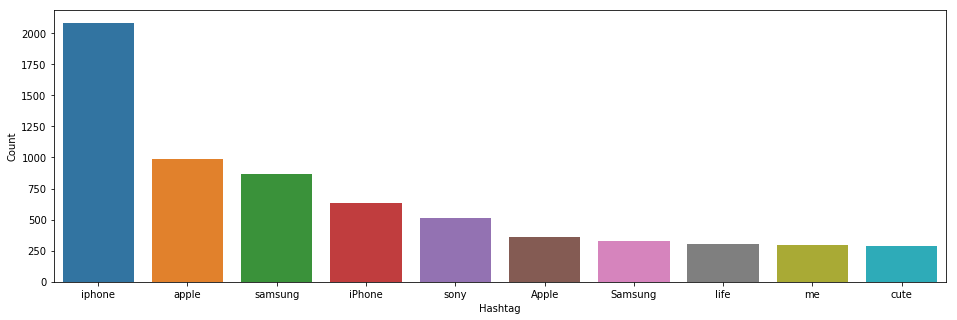

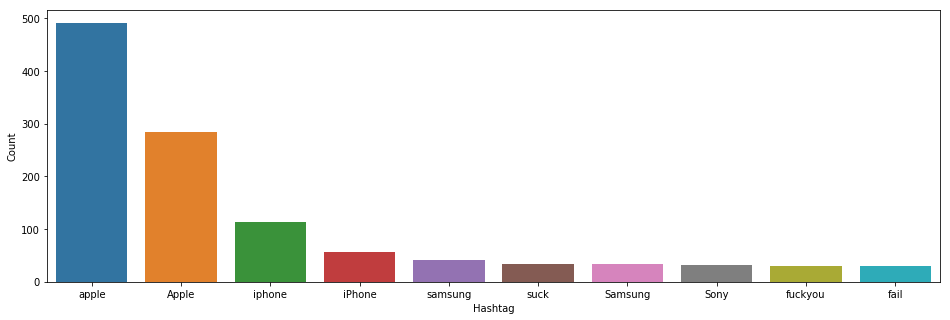

In [12]:
import re
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

import seaborn as sns
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

import seaborn as sns
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

<h1>Modeling</h1>

In [122]:
# logistic
classifier = LogisticRegression(C=2)
classifier.fit(df_train,train['label'])
kfold = model_selection.StratifiedKFold(n_splits=5,random_state=25)
cv_results = model_selection.cross_val_score(classifier,df_train,train['label'],cv=kfold,scoring='f1_weighted')
pro = classifier.predict(df_test)

In [123]:
cv_results.mean()

0.8962462303234571

In [121]:
# Submission
submission = pd.DataFrame({'id':test['id'],'label':new})
submission.to_csv("diff.csv",index = False)

In [65]:
matrix_train = pd.DataFrame(X_train_word_features.toarray())
df_train2 = train[['No_of_words', 'No_of_char','Average_len_words', 'No_of_stopwords', 'No_of_hashtags','No_of_digits', 'No_of_link', 'upper','Number_of_good_words', 'Number_of_bad_words','No_of_vulgar']]

In [66]:
matrix_test = pd.DataFrame(test_features.toarray())
df_test2 = test[['No_of_words', 'No_of_char','Average_len_words', 'No_of_stopwords', 'No_of_hashtags','No_of_digits', 'No_of_link', 'upper','Number_of_good_words', 'Number_of_bad_words','No_of_vulgar']]

In [71]:
model1 = LogisticRegression(C=1)
model1.fit(df_train2,train['label'])
kfold = model_selection.StratifiedKFold(n_splits=5,random_state=25)
cv_results = model_selection.cross_val_score(model1,df_train2,train['label'],cv=kfold,scoring='f1_weighted')
predict1 = model1.predict(df_test2)

In [124]:
# LDA
model = LinearDiscriminantAnalysis()
model.fit(df_train2,train['label'])
cv_results = model_selection.cross_val_score(model,df_train2,train['label'],cv=kfold,scoring='f1_weighted')
predict = model.predict(df_test2)

In [134]:
params={
'n_estimators':50,
'objective': 'binary:logistic',
'learning_rate': 0.09,
#     0.070
'gamma':1,
'subsample':0.65,
'colsample_bytree':0.90,
'min_child_weight':2,
'max_depth':8,
'seed':1024,
'nthread':5,
'scale_pos_weight':3, 
}

clf = XGBClassifier(**params)
clf.fit(df_train2, train['label'])
kfold = model_selection.StratifiedKFold(n_splits=5,random_state=25)
cv_results = model_selection.cross_val_score(clf,df_train2,train['label'],cv=kfold,scoring='f1_weighted')

C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

In [135]:
clf.feature_importances_

array([0.10011813, 0.21854696, 0.247785  , 0.10956881, 0.09480213,
       0.01742469, 0.02953337, 0.07944477, 0.04459539, 0.04784406,
       0.01033668], dtype=float32)

In [137]:
cv_results

array([0.87396595, 0.87792026, 0.87820657, 0.86736781, 0.86825366])

In [136]:
predict.sum()

593

In [74]:
cv_results.mean()

0.8739061206667159

In [98]:
model2 = LogisticRegression(C=4)
model2.fit(matrix_train,train['label'])
kfold = model_selection.StratifiedKFold(n_splits=5,random_state=25)
cv_results = model_selection.cross_val_score(model2,matrix_train,train['label'],cv=kfold,scoring='f1_weighted')
predict2 = model2.predict(matrix_test)

In [99]:
predict2.sum()

484

In [100]:
cv_results.mean()

0.8830927722856368

In [119]:
new = []
for x,y in zip(predict1,predict2):
    if((x==0)|(y==0)):
        new.append(0)
    else:
        new.append(1)
        

In [120]:
sum(new)

413